<div style="text-align: center; font-size: 30pt; font-weight: bold; margin: 1em 0em 1em 0em">Visualization</div>

In [1]:
import sys, os

In [2]:
sys.path.append(os.path.abspath('../autoencoders'))

In [3]:
# "Magic" commands for automatic reloading of module, perfect for prototyping
%reload_ext autoreload
%autoreload 2

import wasserstein
import proteins
import visualization

In [4]:
import matplotlib.pyplot as plt

In [5]:
# LaTeX rendering in graphs
try:
    plt.rc('text', usetex=True)
except:
    pass

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

In [6]:
import numpy as np
import pandas as pd

import torch

In [7]:
from tqdm import tqdm

# Paths

In [8]:
ROOT = '../'

In [9]:
MODULE_PATH = ROOT + 'autoencoders/'
DATA_PATH = ROOT + 'data/'
NOTEBOOK_PATH = ROOT + 'notebooks/'
MODELS_PATH = ROOT + 'models/'
GRAPHICS_PATH = ROOT + 'graphics/'

# Loading the model

In [10]:
model = proteins.WassersteinAutoEncoder(ksi=10., hidden_dimension=10)
model.load_state_dict(torch.load(MODELS_PATH + 'wae-h=10.weights', map_location='cpu'))

In [11]:
model2 = proteins.WassersteinAutoEncoder(ksi=10., hidden_dimension=2)
model2.load_state_dict(torch.load(MODELS_PATH + 'wae.weights', map_location='cpu'))

# Dataset

In [12]:
complete_set = np.load(DATA_PATH + 'pgm-dataset.npy')

In [13]:
prot = visualization.Protein(complete_set[0])

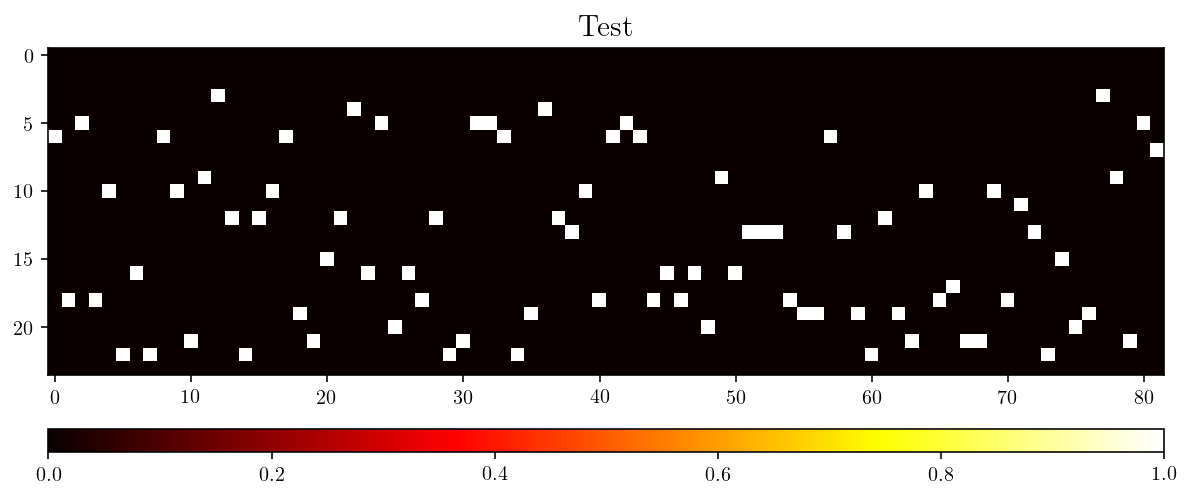

In [13]:
prot.plot_sequence(title='Test', save=GRAPHICS_PATH+'test-visualization.pdf')

In [14]:
with torch.no_grad():
    reconstruction, latent = model(torch.Tensor(complete_set))

In [15]:
with torch.no_grad():
    reconstruction2, latent2 = model2(torch.Tensor(complete_set))

In [16]:
reconstruction = np.array(reconstruction)

In [17]:
reconstruction2 = np.array(reconstruction2)

# Accuracy of the reconstructions

In [ ]:
accuracy = pd.DataFrame(columns=[2, 10], index=np.arange(len(complete_set)))

for i, (r, p, r2) in tqdm(enumerate(zip(reconstruction.reshape(-1, 24, 82), complete_set.reshape(-1, 24, 82), reconstruction2.reshape(-1, 24, 82))), ascii=True, ncols=100):
    
    accuracy.loc[i] = [
        (r2.argmax(axis=0) == p.argmax(axis=0)).mean(), 
        (r.argmax(axis=0) == p.argmax(axis=0)).mean()
    ]

In [26]:
accuracy[10] = accuracy[10].astype(float)

In [46]:
accuracy.describe()

,2,10
count,50000.000000,50000.000000
mean,62.256902,67.969976
std,21.919469,22.183155
min,20.731707,19.512195
25%,42.682927,46.341463
50%,59.756098,68.292683
75%,82.926829,90.243902
max,100.000000,100.000000


In [33]:
accuracy.head()

hidden dim,2,10
sequence ID,,
0,51.219512,64.634146
1,48.780488,56.097561
2,45.121951,57.317073
3,68.292683,52.439024
4,64.634146,68.292683


In [32]:
accuracy.columns.names = ['hidden dim']
accuracy.index.names = ['sequence ID']

Let us save this hard-earned table:

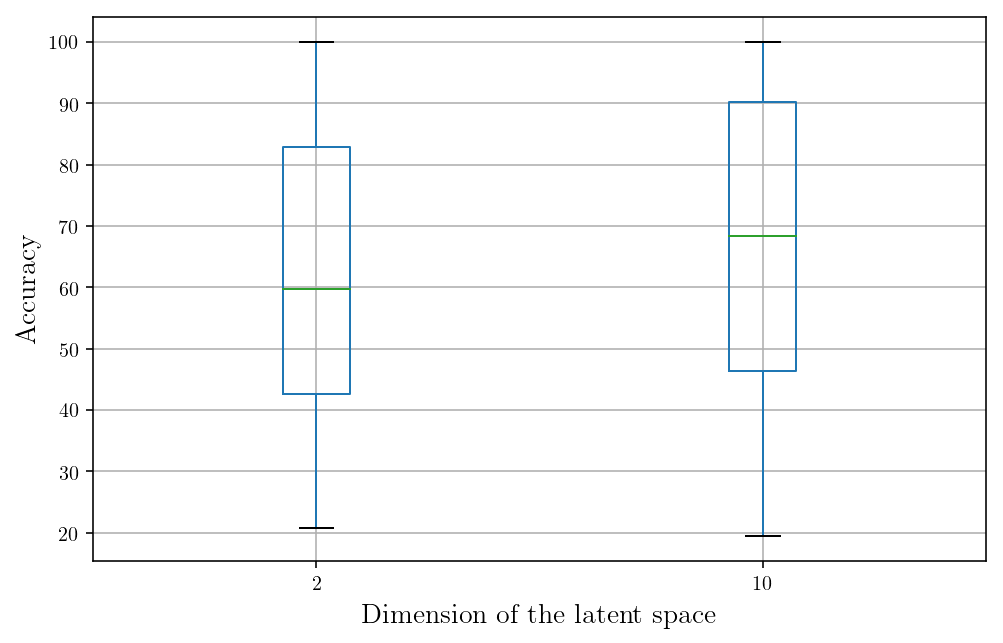

In [41]:
plt.figure(figsize=(8, 5))
accuracy.boxplot()

plt.xlabel('Dimension of the latent space', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.savefig(GRAPHICS_PATH + 'accuracy-boxplots.pdf')

In [34]:
accuracy.to_csv('accuracy.csv')

In [45]:
accuracy = pd.read_csv('accuracy.csv', index_col=0)

# Log-probability of the reconstructions

In [21]:
logprob = pd.DataFrame(columns=[2, 10], index=np.arange(len(complete_set)), dtype=np.longfloat)

for i, (r, p, r2) in tqdm(enumerate(zip(reconstruction, complete_set, reconstruction2)), ascii=True, ncols=100, total=len(complete_set)):
    
    logprob.loc[i, 2] = np.log(r2[p == 1]).sum()
    logprob.loc[i, 10] = np.log(r[p == 1]).sum()

 50%|###########################5                           | 25074/50000 [00:06<00:06, 4042.75it/s]/Users/basile/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
100%|#######################################################| 50000/50000 [00:12<00:00, 3899.84it/s]


In [26]:
accuracy[10] = accuracy[10].astype(float)

In [22]:
logprob.describe()

,2,10
count,50000.000000,5.000000e+04
mean,-97.403749,-inf
std,53.150451,NaN
min,-261.561798,-inf
25%,-142.929443,-1.361324e+02
50%,-109.119217,-8.704722e+01
75%,-48.441822,-3.113178e+01
max,-7.847943,-4.734332e+00


In [23]:
prob.head()

,2,10
0,0.000000e+00,2.452272e-43
1,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00
4,1.121039e-44,1.528733e-38


In [32]:
accuracy.columns.names = ['hidden dim']
accuracy.index.names = ['sequence ID']

Let us save this hard-earned table:

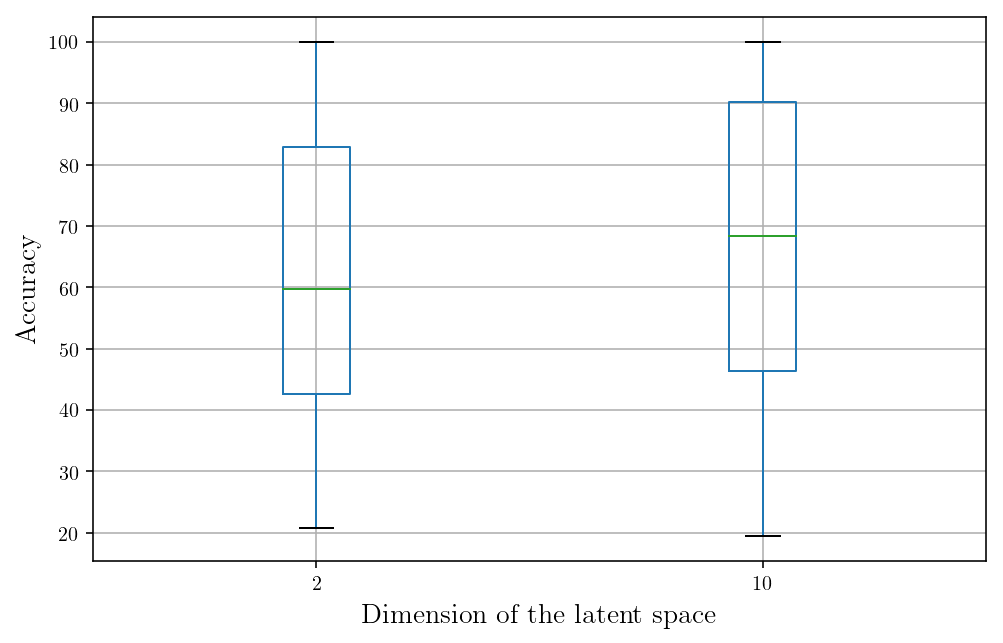

In [41]:
plt.figure(figsize=(8, 5))
accuracy.boxplot()

plt.xlabel('Dimension of the latent space', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.savefig(GRAPHICS_PATH + 'accuracy-boxplots.pdf')

In [34]:
accuracy.to_csv('accuracy.csv')

In [49]:
i = -1

16
Accuracy h=10 : 37.80487804878049
Accuracy h=2  : 40.24390243902439


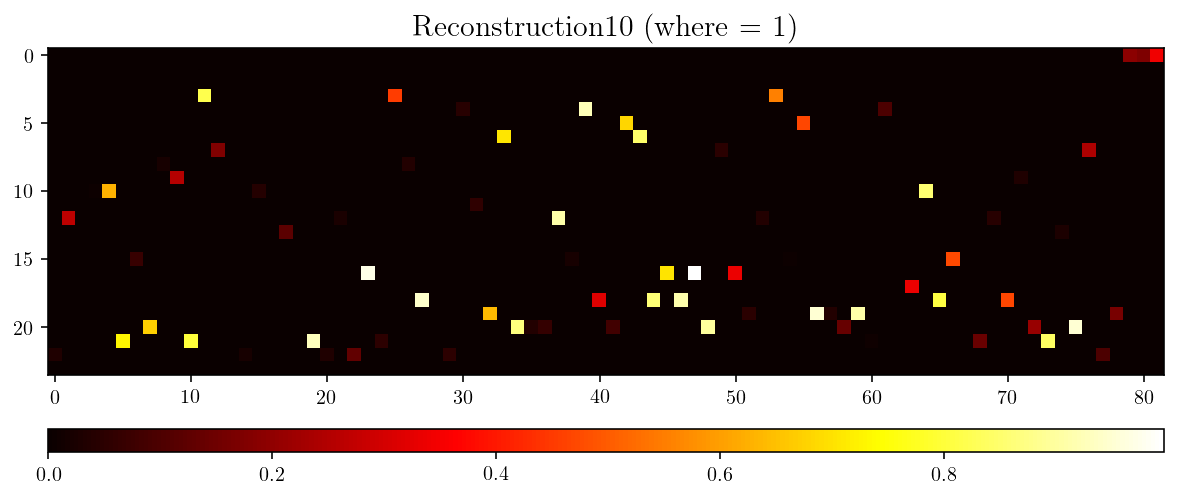

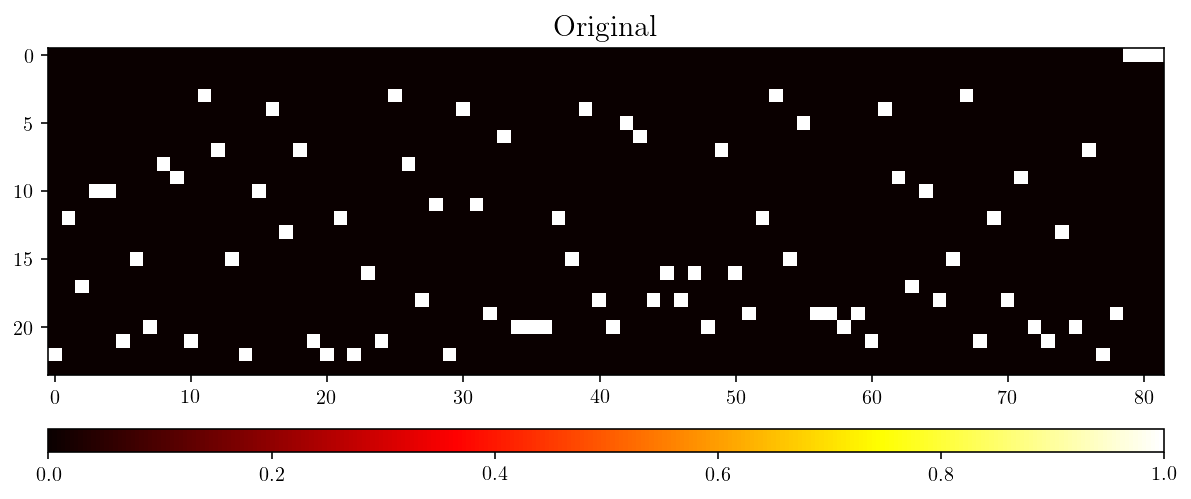

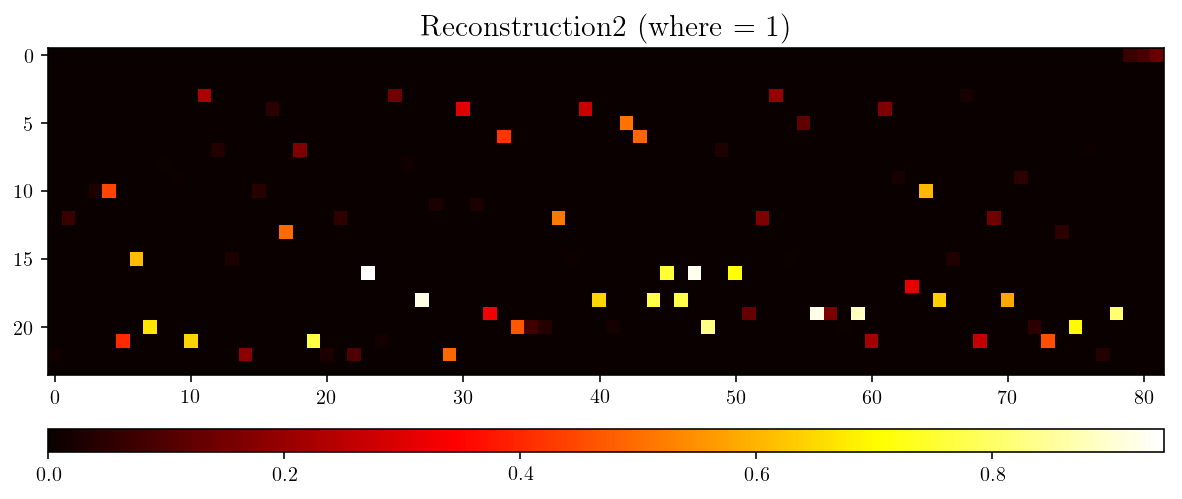

In [66]:
i += 1

print(i)

prot = visualization.Protein(complete_set[i])
recon = visualization.Protein(reconstruction[i])
recon2 = visualization.Protein(reconstruction2[i])

accuracy = (recon.array.argmax(axis=0) == prot.array.argmax(axis=0)).sum() * 100 / 82
accuracy2 = (recon2.array.argmax(axis=0) == prot.array.argmax(axis=0)).sum() * 100 / 82

recon.array[prot.array == 0] = 0
recon2.array[prot.array == 0] = 0

print('Accuracy h=10 : {acc}'.format(acc=accuracy))
print('Accuracy h=2  : {acc}'.format(acc=accuracy2))

recon.plot_sequence(title='Reconstruction10 (where = 1)')
prot.plot_sequence(title='Original')
recon2.plot_sequence(title='Reconstruction2 (where = 1)')

In [30]:
(recon2.array.argmax(axis=0) == prot.array.argmax(axis=0)).sum() * 100 / 82

100.0